<a href="https://colab.research.google.com/github/adey4/food-sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 4
##### Ankit Dey

In [ ]:
import pandas as pd
import numpy as np
sales_predictions = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSwXLcK1gHn4S6xdVnTN1kZIAdiR3EGWqJKzxOoqEKOdk--tVrbdN_aIQN-PgCVUSyMU_R7KSHsGkOV/pub?gid=135014557&single=true&output=csv'
df = pd.read_csv(sales_predictions)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# How many rows and columns?
df.info()

# 8523 rows, 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# What are the datatypes of each column?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Are there any duplicates? Drop them
df.duplicated().sum()

## If there were duplicates, run:
## df.drop_duplicates(inplace=True)

0

In [ ]:
# Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Address the missing values and explain why you handled them this way
# Address Item Weight
df['Item_Weight'].describe()

## Item Weight column has 83% of data not missing -> still useful
## Item weight may be important to predicting sales (e.g. customers may not want to deal with heavier items) -> cannot drop Item Weight column
## No large outliers in Item Weight -> can use mean to impute values

mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Address Outlet_Size

df['Outlet_Size'].describe()

## Outlet Size column has 72% of data not missing -> still useful
## Outlet Size may impact sales -> do not drop column
## Categorical data -> fill with most common value

mode_outlet_size = df['Outlet_Size'].mode().iloc[0]
df['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [ ]:
# Confirm there are no more missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Find and fix inconsistent categories of data
data_types = df.dtypes
str_cols = data_types[data_types == 'object'].index

for col in str_cols:
  print(f'- {col}:')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [ ]:
# Fix syntax in Item Fat Content Column
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# Obtain summary stats for all numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

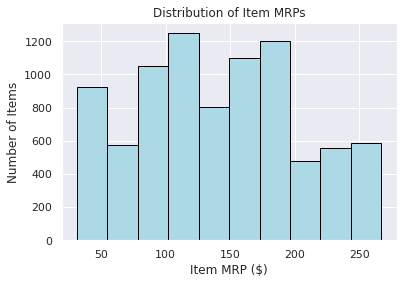

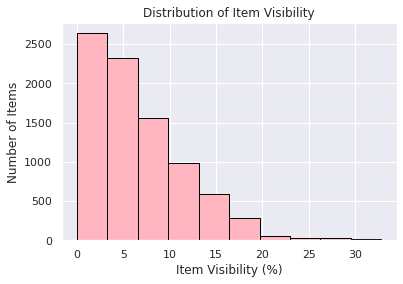

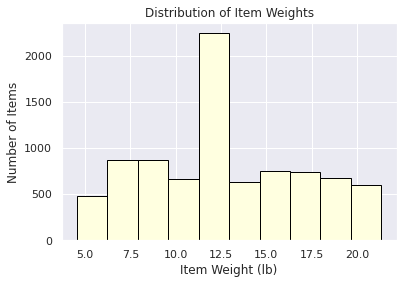

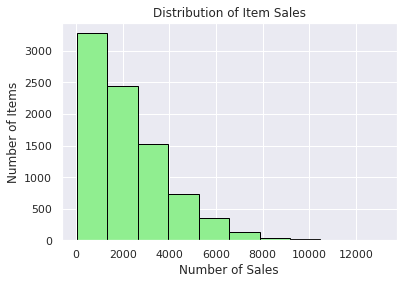

In [ ]:
# View distributions of variables of interest
sns.set(style='darkgrid')
df['Item_MRP'].hist(color='lightblue', edgecolor='black')
plt.xlabel('Item MRP ($)')
plt.ylabel('Number of Items')
plt.title('Distribution of Item MRPs');
plt.show()
print('\n')

percent_visibility = np.array(df['Item_Visibility']*100)
plt.hist(x=percent_visibility, color='lightpink', edgecolor='black')
plt.xlabel('Item Visibility (%)')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Visibility');
plt.show()
print('\n')

df['Item_Weight'].hist(color='lightyellow', edgecolor='black')
plt.xlabel('Item Weight (lb)')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Weights');
plt.show()
print('\n')

df['Item_Outlet_Sales'].hist(color='lightgreen', edgecolor='black')
plt.xlabel('Number of Sales')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Sales');
plt.show()
print('\n')

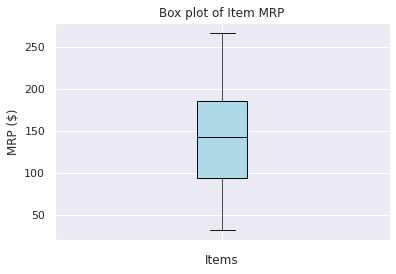

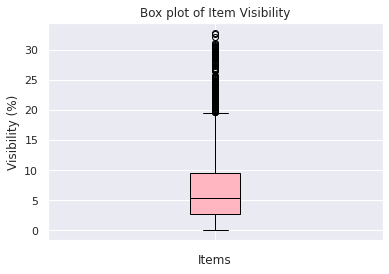

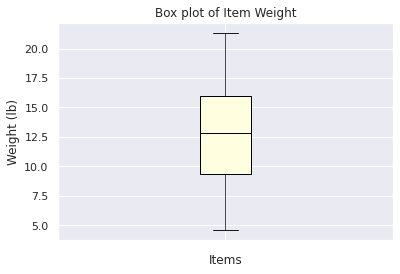

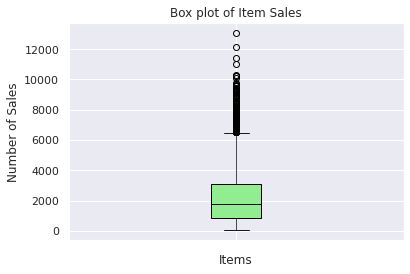

In [ ]:
# View summary stats of variables of interest
df.boxplot(column='Item_MRP',
           patch_artist='True',
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'));
plt.gca().set_xticklabels('')
plt.xlabel('Items')
plt.ylabel('MRP ($)')
plt.title('Box plot of Item MRP');
plt.show()
print('\n')

plt.boxplot(x=percent_visibility,
           patch_artist='True',
           boxprops=dict(facecolor='lightpink'),
           medianprops=dict(color='black'));
plt.gca().set_xticklabels('')
plt.xlabel('Items')
plt.ylabel('Visibility (%)')
plt.title('Box plot of Item Visibility');
plt.show()
print('\n')

df.boxplot(column='Item_Weight',
           patch_artist='True',
           boxprops=dict(facecolor='lightyellow'),
           medianprops=dict(color='black'));
plt.gca().set_xticklabels('')
plt.xlabel('Items')
plt.ylabel('Weight (lb)')
plt.title('Box plot of Item Weight');
plt.show()
print('\n')


df.boxplot(column='Item_Outlet_Sales',
           patch_artist='True',
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='black'));
plt.gca().set_xticklabels('')
plt.xlabel('Items')
plt.ylabel('Number of Sales')
plt.title('Box plot of Item Sales');
plt.show()
print('\n')

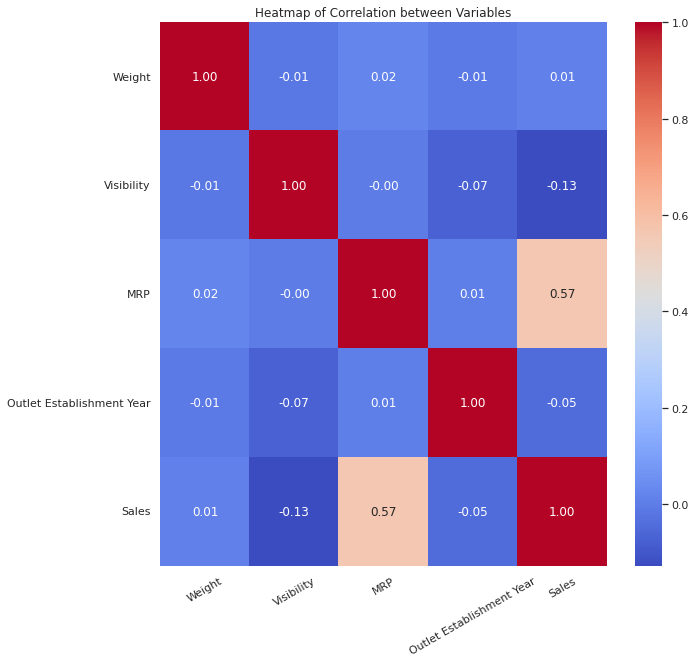

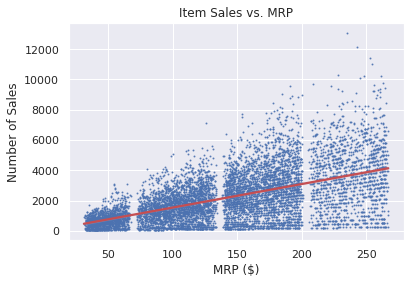

In [ ]:
# View heatmap of correlation between variables
corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',
            xticklabels=['Weight', 'Visibility', 'MRP', 'Outlet Establishment Year', 'Sales'],
            yticklabels=['Weight', 'Visibility', 'MRP', 'Outlet Establishment Year', 'Sales'])
plt.title('Heatmap of Correlation between Variables')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()
print('\n')

sns.regplot(data=df,
            x='Item_MRP',
            y='Item_Outlet_Sales',
            scatter_kws=dict(s=1),
            line_kws=dict(color='r'))
plt.xlabel('MRP ($)')
plt.ylabel('Number of Sales')
plt.title('Item Sales vs. MRP')
plt.show()

# MRP is moderately correlated with sales

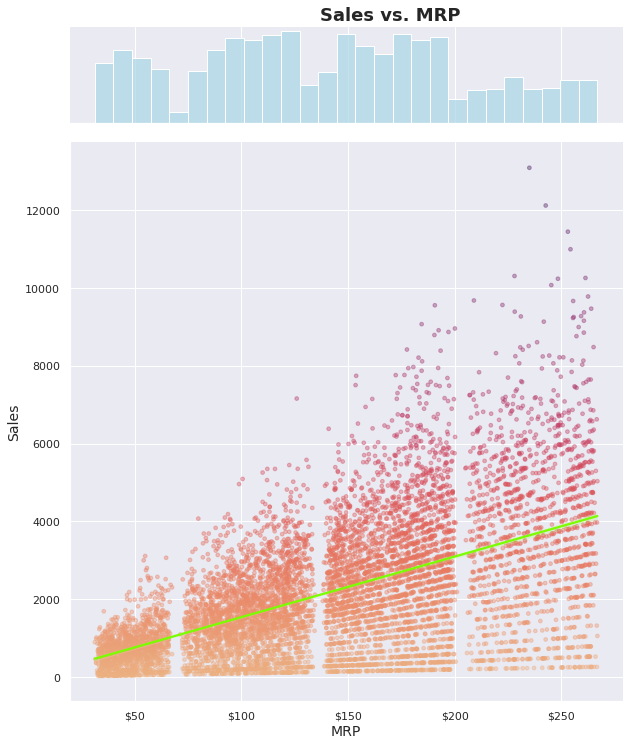

In [103]:
g = sns.JointGrid(height=10)

sns.regplot(data=df,
            x='Item_MRP',
            y='Item_Outlet_Sales',
            scatter_kws=dict(s=14, alpha=.4, c=df['Item_Outlet_Sales'], color=None, cmap='flare'),
            line_kws=dict(color='lawngreen'),
            ax=g.ax_joint)
g.set_axis_labels('MRP', 'Sales', fontsize=14)
plt.suptitle('Sales vs. MRP', y=1.01, fontweight='semibold', fontsize=18)
g.ax_marg_y.remove()
g.ax_joint.set_xticklabels(['0', '$50', '$100', '$150', '$200', '$250'])

sns.histplot(data=df, x='Item_MRP', ax=g.ax_marg_x, color='lightblue')

plt.show()

# Sales tend to increase at higher MRPs, even though fewer items have high MRPs

In [ ]:
import plotly.express as px

In [102]:
color_discrete_sequence = ['blue']*len(df) # From https://stackoverflow.com/questions/69146994/how-to-set-specific-color-to-some-bars-in-a-plotly-bar-graph
color_discrete_sequence[2] = 'red'
color_discrete_sequence[4] = 'lightgreen'
color_discrete_sequence[9] = 'red'

fig = px.histogram(df,
             x='Outlet_Identifier',
             y='Item_Outlet_Sales',
             histfunc='avg',
             labels=dict(Outlet_Identifier = 'Outlet Identifier', Item_Outlet_Sales = 'Sales'),
             color='Outlet_Identifier',
             color_discrete_sequence=color_discrete_sequence)
fig.update_layout(xaxis_tickformat='$', yaxis_title='Average Sales', title='Average Sales per Outlet', showlegend=False)
fig.show() # OUT010 and OUT019 have low average sales, while OUT027 has high average sales

In [101]:
fig = px.histogram(df, 
                   x='Item_MRP', 
                   y='Item_Outlet_Sales', 
                   color='Outlet_Identifier',
                   nbins = 10, 
                   histfunc='avg', 
                   labels=dict(Item_MRP = 'MRP', Item_Outlet_Sales = 'Sales', Outlet_Identifier = 'Outlet Identifier'),
                   title='Average Sales vs. MRP by Outlet')
fig.update_layout(yaxis_title='Average Sales', xaxis_tickformat='$', bargap=0.5,
                  xaxis = dict(
                  tickmode = 'linear',
                  tick0 = 25,
                  dtick = 50))
fig.show() # OUT019 and OUT010 account for a low proportion of sales across all MRPs, while OUT027 accounts for a high proportion of sales across all MRPs

AttributeError: ignored